<a href="https://colab.research.google.com/github/DawidJag/clustering_mall_customers/blob/master/mall_customers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing neccessary libriaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

%matplotlib inline

Data upload and exploration (first look)

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Clustering/Mall customer segmentation/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Copy of data to have raw database available if needed later

In [5]:
data = df.copy()
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Changing data type from object to category

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data['Gender'] = data['Gender'].astype('category')

In [8]:
data = data.drop('CustomerID', axis=1)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Data exploration

In [9]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [11]:
data.describe(include=['category'])

,Gender
count,200
unique,2
top,Female
freq,112


Preparing pairplot and heatmap to recognize correlation and possible patterns

In [12]:
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


Conversion of category data to numerical

In [13]:
data = pd.get_dummies(data=data, drop_first=True)
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



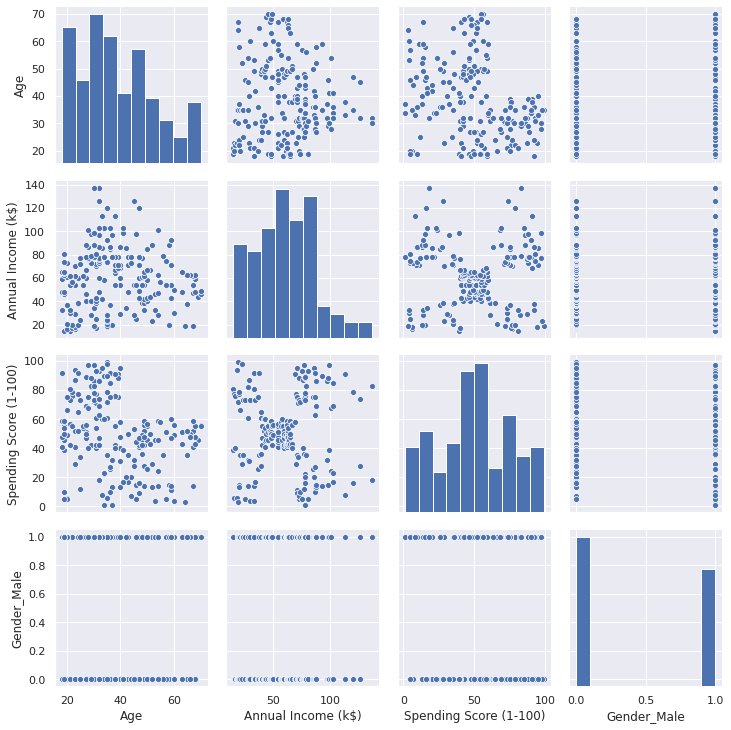

In [14]:
#scatterplot
import seaborn as sns

sns.set()
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
sns.pairplot(data[cols], height = 2.5)
plt.show();

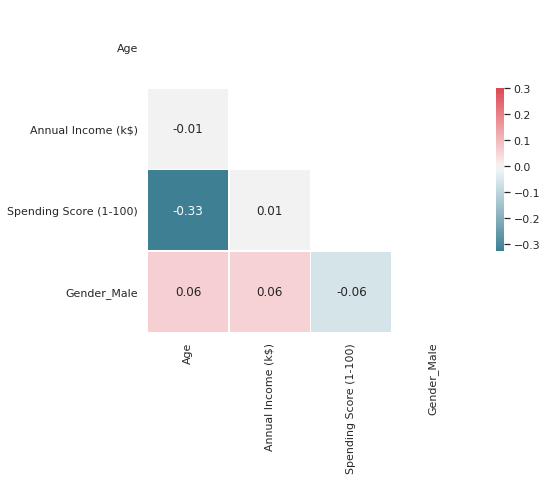

In [15]:
# Heatmap
corr = data.corr()
corr

sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='0.2f')

Based on above comparison we will make clustering in three cases, taking into account:

a) annual income - spending score

b) age - spending score

c) age - annual income - spending score

## K-Means estimator

Definition of function for calculating WCSS matrix

In [16]:
def wcss(data, max_clusters=10):
  wcss = []
  for i in range(2, max_clusters):
      kmeans = KMeans(n_clusters=i)
      kmeans.fit(data)
      wcss.append(kmeans.inertia_)

  wcss = pd.DataFrame(wcss, columns=['wcss'])
  wcss = wcss.reset_index()
  wcss = wcss.rename(columns={'index': 'clusters'})
  wcss['clusters'] += 1
  return wcss
  

a) annual income - spending score

---





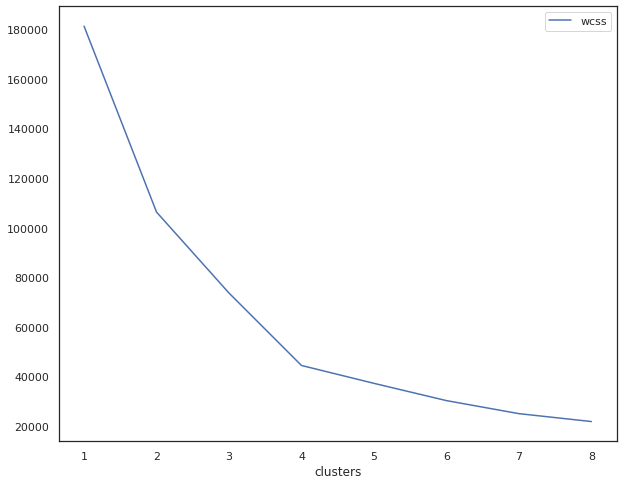

In [36]:
# a) annual income - spending score
X_1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# elbow method
wcss_a = wcss(X_1,10)
wcss_a.plot(x='clusters', y='wcss', figsize=(10,8))


Based on above chart (elbow method) we choose 5 clusters

In [38]:
kmeans_1 = KMeans(n_clusters=5, random_state=42)
kmeans_1.fit(X_1)
y_pred_1 = kmeans_1.predict(X_1)

data['y_pred_1'] = y_pred_1
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,y_pred_1
0,19,15,39,1,3
1,21,15,81,1,0
2,20,16,6,0,3
3,23,16,77,0,0
4,31,17,40,0,3
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,4
197,32,126,74,1,2
198,32,137,18,1,4


In [39]:
px.scatter(data, 'Annual Income (k$)', 'Spending Score (1-100)', 'y_pred_1', width=800, height=500, title='K-Means estimator - 5 clusters')

b) age - spending score


---



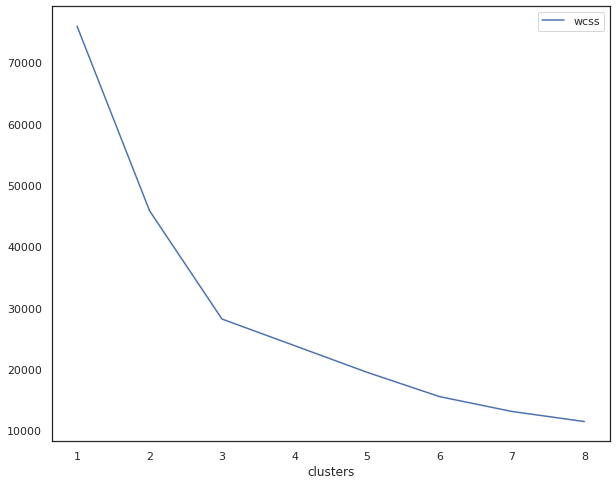

In [40]:
# b) age - spending score

X_2 = data[['Age', 'Spending Score (1-100)']]

# elbow method
wcss_b = wcss(X_2,10)
wcss_b.plot(x='clusters', y='wcss', figsize=(10,8))

Based on above chart we choose 43 clusters

In [43]:

kmeans_2 = KMeans(n_clusters=3, random_state=42)
kmeans_2.fit(X_2)
y_pred_2 = kmeans_2.predict(X_2)

data['y_pred_2'] = y_pred_2
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,y_pred_1,y_pred_2
0,19,15,39,1,3,0
1,21,15,81,1,0,1
2,20,16,6,0,3,2
3,23,16,77,0,0,1
4,31,17,40,0,3,0
...,...,...,...,...,...,...
195,35,120,79,0,2,1
196,45,126,28,0,4,2
197,32,126,74,1,2,1
198,32,137,18,1,4,2


In [44]:
px.scatter(data, 'Age', 'Spending Score (1-100)', 'y_pred_2', width=800, height=500, title='K-means estimator - 3 clusters')

c) age - annual income - spending score

---




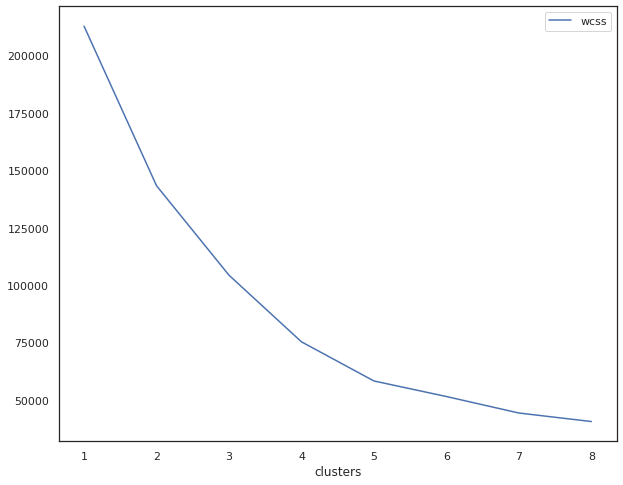

In [45]:
# c) age - annual income - spending score

X_3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# elbow method
wcss_c = wcss(X_3,10)
wcss_c.plot(x='clusters', y='wcss', figsize=(10,8))


Based on above chart we choose 6 clusters

In [46]:
kmeans_3 = KMeans(n_clusters=6, random_state=42)
kmeans_3.fit(X_3)
y_pred_3 = kmeans_3.predict(X_3)

data['y_pred_3'] = y_pred_3.astype(str)
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,y_pred_1,y_pred_2,y_pred_3
0,19,15,39,1,3,0,0
1,21,15,81,1,0,1,1
2,20,16,6,0,3,2,0
3,23,16,77,0,0,1,1
4,31,17,40,0,3,0,0
...,...,...,...,...,...,...,...
195,35,120,79,0,2,1,4
196,45,126,28,0,4,2,2
197,32,126,74,1,2,1,4
198,32,137,18,1,4,2,2


In [48]:
px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='y_pred_3', 
              symbol='y_pred_3', opacity=0.7, size_max=6, width=1050, height=700, 
              template='plotly_dark', title='Customer clustering')